# Ricardo Akira Kato Lopes - RM551447

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [74]:
df = pd.read_csv('estate.csv')

In [100]:
df = df.rename({'X1 transaction date': 'transaction_date', 'X2 house age': 'house_age', 'X3 distance to the nearest MRT station': 'distance_MRT', 'X4 number of convenience stores': 'num_convstores', 'X5 latitude': 'latitude', 'X6 longitude': 'longitude',  'Y house price of unit area': 'house_price_UA'}, axis=1)

In [102]:
df

,No,transaction_date,house_age,distance_MRT,num_convstores,latitude,longitude,house_price_UA
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


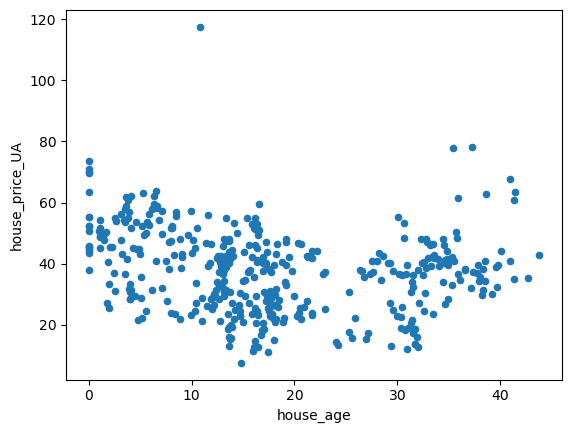

In [104]:
df.plot(kind='scatter', x='house_age',y='house_price_UA')
plt.show()

In [106]:
#Test train split for supervised learning
X_train, X_test, y_train, y_test = train_test_split(df.house_age, df.house_price_UA)

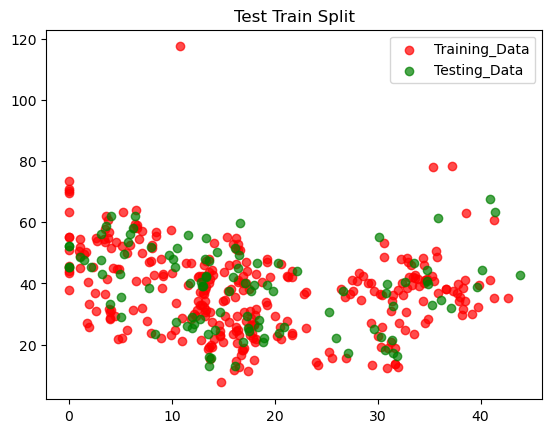

In [112]:
plt.scatter(X_train, y_train, label='Training_Data', color='r', alpha=.7)
plt.scatter(X_test, y_test, label='Testing_Data', color='g', alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

## Training and testing 
Here we use the data from our dataframe to test and train the machine to learn a little with all the points in the plot.

The red points will be used to create the linear model line

The green dots will be used to test the line created with the red points

### The next step will be create the linear model and train it

In [118]:
LR = LinearRegression()

LR.fit(X_train.values.reshape(-1,1), y_train.values)


LinearRegression()

### Now we can use this model to predict our data

Using the actual test DATA

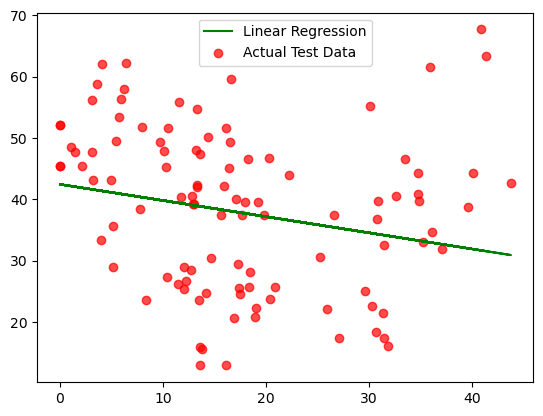

In [121]:
prediction = LR.predict(X_test.values.reshape(-1, 1))

# Here we make the plor prediction line against the actual test data
plt.plot(X_test, prediction, label='Linear Regression', color='g')
plt.scatter(X_test,y_test, label='Actual Test Data', color='r', alpha=.7)
plt.legend()
plt.show()

## Having this model we can now see how the model could predict the price of unit area by using the house age (let´s say 44 for this example)

We can do that by using the predict function with numpy

In [127]:
LR.predict(np.array([[44]]))[0]

30.855893571104

This predicted that the price of unit area of that house would be 30.8, we can see that in our plot by following the line

### Now we will score this model using scikit_learn built in score function

In [133]:
LR.score(X_test.values.reshape(-1,1), y_test.values)

# Having in mind that the highest number we can get is 1.0
## So it´s not a perfect model, but for a Linear Regression Model with that kind of data is fitting it´s purpose

0.028051013013184245